In [8]:
#importing libraries

import random
import numpy as np
from scipy.io  import loadmat
import math
import matplotlib.pyplot as plt

In [9]:
def bec(b,p):     # bec channel
  a = b.copy()
  for i in range(0,len(a)):
    if random.random() <= p:
      a[i] = -1
  return a

def rat(i):       # to find likelyhood ratio
  if i==1:
    i = 0.999999999
  if i==0:
    i = 0.000000001
  return i/(1-i)
  
def c2v(aa,ii):  # to calculate values for VNs, odd parity
  aa = np.delete(aa,ii) 
  length = len(aa)
  sum = 1
  for i in range(length):
    sum = sum * ( 1 - 2 *aa[i])
  sum = 0.5 - (sum / 2) 
  return sum

In [11]:
def convergence(H,C):

  
  dc = dv = 0

  for a in H[0]:
    if a==1:
      dc = dc + 1

  for na in H[:,0]:
    if na==1:
      dv = dv+1
  #print(dc,dv)
  #  ↑ calculating dc and dv


  row = H.shape[0]
  print(row)
  col = H.shape[1]
  print(col)
  #  ↑ calculating no. of CNs and VNs


  ch = np.array([[-1 for i in range(dc)] for j in range(row)])
  var = np.array([[-1 for i in range(dv)] for j in range(col)])

  for i in range(0,row):
    k = 0
    for j in range(0,col):
      if H[i][j] == 1:
        ch[i][k] = j;
        k = k+1
        for m in range(dv):
          if var[j][m] == -1:
            var[j][m] = i
            break
  #  ↑ implementing tanner graph model
  #print('check = ',ch)
  #print('variable = ',var)


  uu = np.zeros((11,31))  # 2-D array to store error probability for each iteration
  p = 0
  rr = 1                 # N-sim variable
  p_ere = np.zeros(11)    # probabilities 0 to 1
  for i in range(0,11):
    p_ere[i] = p
    uu[i,0] = p*rr
    p = p+0.1
  print(p_ere) 

  for yy in range(2,8):   # to plot graph of convergence for error probability 0.2 to 0.7
    p=p_ere[yy]
    for rrr in range(0,rr):     # simulating
      AC = bec(C,p)          # channel output
    #  print('AC= ',AC)

      acp=np.zeros((col))
      for i in range(0,col):
        if AC[i]==1:
          acp[i] = 1
        elif AC[i]==0:
          acp[i] = 0
        else:
          acp[i] = 0.5
  # ↑ assigning probabilities according to bits
      #print('acp = ')
      #print(acp)
      # ↑ VNs got initial data.

      cs = np.zeros((row,dc))

      for i in range(0,row):
        for j in range(0,dc):
          cs[i][j] = acp[ch[i][j]]

    #  print('cs = ')
    #  print(cs)
      # ↑ CNs got initial data.


      ansp = np.array([-1]*col)
      for u in range(0,30):     #loop for each iteration

        cc = np.zeros((row,dc)) 
        for i in range(0,row):
          for j in range(0,dc):
            cc[i][j] = c2v(cs[i],j)
    #    print('cc = ')
    #   print(cc)
        # ↑ CNs computed to send VNs back.

        vs = np.zeros((col,dv))
        for i in range(0,col):
          for j in range(0,dv):
            ii = var[i][j]
            for k in range(0,dc):
              if ch[ii][k] == i:
                break
            vs[i][j] = cc[ii][k]
    #    print('vs = ')
    #    print(vs)
        # ↑ VN got computed data.

        ans=np.zeros((col))
        for i in range(0,col): 
            ans[i] = math.log(rat(acp[i]),math.e)
            for j in range(0,dv):
              ans[i] = ans[i] + math.log(rat(vs[i][j]),math.e)
            if ans[i]>=0:
              ans[i] = 1
            else:
              ans[i] = 0
    #    print('ans = ',ans)
    # determining answer bits.

        if (ans == ansp).all():
          pass
      #    break
        ansp = ans


        vc = np.zeros((col,dv))
        for i in range(0,col):
          for j in range(0,dv):
            up = acp[i]
            dw = 1-acp[i]
            for k in range(0,dv):
              if var[i][k] == var[i][j]:
                continue
              else:
                up = up * vs[i][k]
                dw = dw * (1-vs[i][k])
            vc[i][j] = up/(up+dw)

    #    print('vc = ')
    #    print(vc)
        # ↑ VN computing to send CNs back.

        for i in range(0,row):
          for j in range(0,dc):
            ii = ch[i][j]
            for k in range(0,dv):
              if var[ii][k] == i:
                break
            cs[i][j] = vc[ii][k]
    #    print('cs = ',cs)
        # CN gets computed data for next iteration.

        one = np.count_nonzero(ans == 1)    # error probabilities for each iteration for graph
        co = 0
        for i in range(0,col):
          if ans[i] != C[i]:
            co = co + 1
        uu[yy,u+1] = uu[yy,u+1] + co/col
  uu = uu/rr
  for i in range(2,8):        #plotting convergence graph.
    plt.plot(range(1,32),uu[i,:],linewidth = '2.5')
  plt.legend(["p = 0.2", "p = 0.3","p = 0.4","p = 0.5","p = 0.6","p = 0.7"])
  plt.title("3792 X 5056 H_mat, dc = 4, dv = 3, Soft BEC ")
  plt.xlabel("No. of iterations")
  plt.ylabel("probability of error")
  plt.grid()


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  after removing the cwd from sys.path.


(4, 2)
3792
5056
[0.  0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1. ]


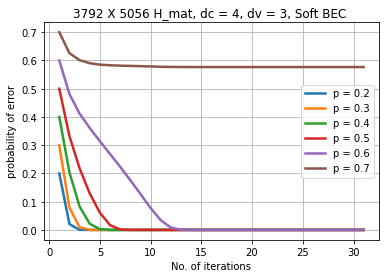

In [13]:
'''
aa = loadmat('Hmatrix.mat')   #to load H_matrix in google colab
result = aa.items()              #copy path in loadmat function to load H_matrix which is in the same directory
data = list(result)
HH = np.array(data)
print(HH.shape)
H = HH[3][1]

'''
H = np.array([[1,0,0,0,0,1,0,1,0,1,0,0],
              [1,0,0,1,1,0,0,0,0,0,1,0],
              [0,1,0,0,1,0,1,0,1,0,0,0],
              [0,0,1,0,0,1,0,0,0,0,1,1],
              [0,0,1,0,0,0,1,1,0,0,0,1],
              [0,1,0,0,1,0,0,0,1,0,1,0],
              [1,0,0,1,0,0,1,0,0,1,0,0],
              [0,1,0,0,0,1,0,1,0,1,0,0],
            [0,0,1,1,0,0,0,0,1,0,0,1]])

  # 9 X 12 H_matrix
C = np.zeros((5056))    # input message all zeros
convergence(H,C)